CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
iris = datasets.load_iris(as_frame=True)
iris_X = iris.data
iris_y = iris.target
pd.concat([iris_X, iris_y], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


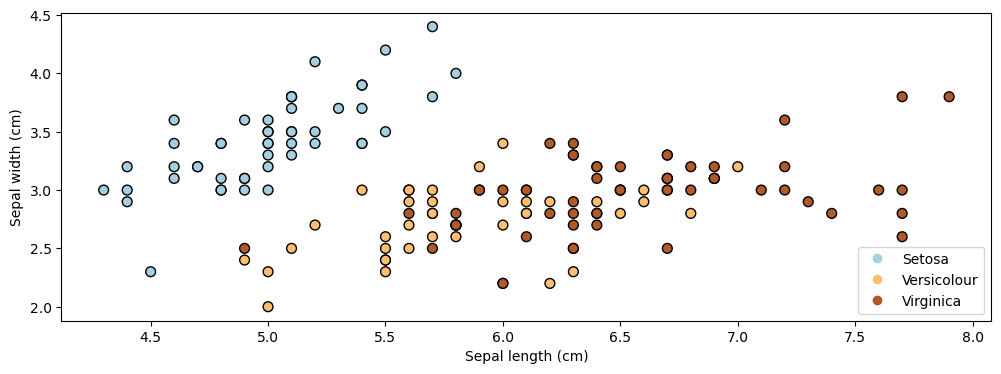

In [4]:
plt.rcParams['figure.figsize'] = [12,4]
p1 = plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1], c=iris_y, edgecolor='k', s=50, 
                 cmap = plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'],
          loc='lower right')

In [8]:
logreg = LogisticRegression(C=1e5)
X = iris_X.to_numpy()[:,:2]
Y = iris_y.copy()
logreg.fit(X, Y)

LogisticRegression(C=100000.0)

Text(0, 0.5, 'Sepal width (cm)')

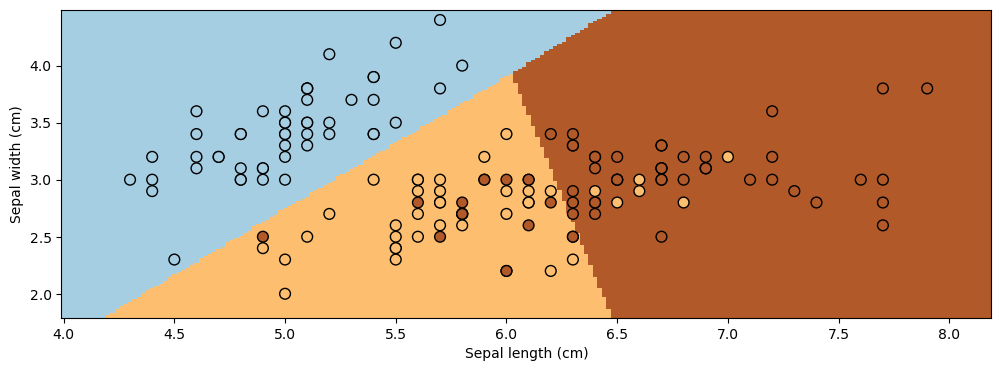

In [9]:
xx, yy = np.meshgrid(np.arange(4,8.2,0.02), np.arange(1.8,4.5,0.02))
# np.ravel() - return a contiguous flattened array
# np.c_() - translates sliced objects to concatenation along the second axis
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plt.pcolormesh(X,Y,C) - create a pseudocolor plot
#     C - the mesh data
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=Y, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

LOGISTIC REGRESSION

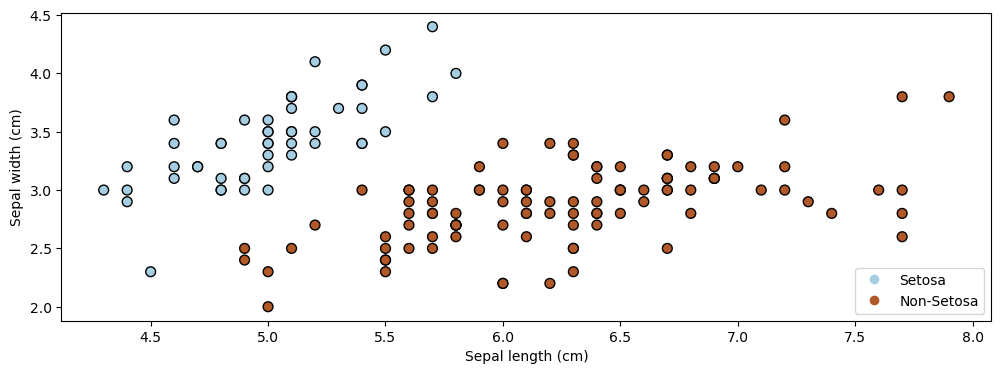

In [10]:
iris_y2 = iris_y.copy()
iris_y2[iris_y2 == 2] = 1
p1 = plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1], c=iris_y2, edgecolor='k', s=50,
                cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Text(0, 0.5, 'sigmoid(z)')

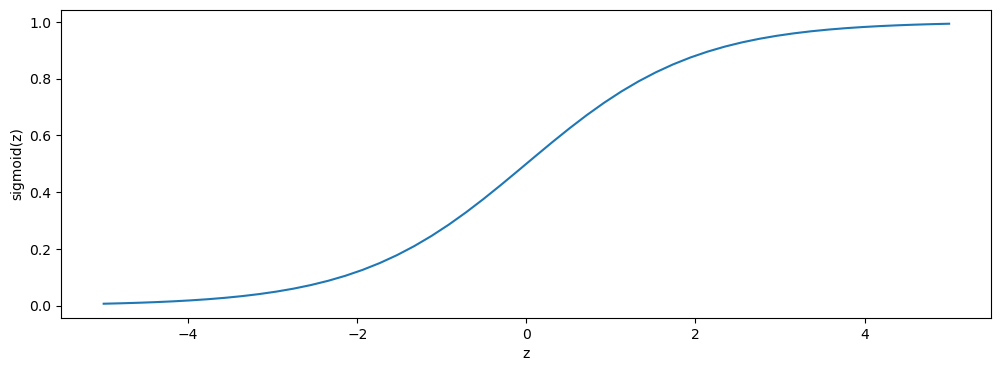

In [12]:
z = np.linspace(-5,5)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

In [13]:
def f(X, theta):
    """ The sigmoid model we are trying to fit.
    """
    return sigmoid(X.dot(theta))

In [14]:
def log_likelihood(theta, X, y):
    """ The cost function defining the goodness of fit.
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

In [15]:
def log_likelihood_gradient(theta, X, y):
    return np.mean((f(X, theta) - y)*X.T, axis=1)

In [16]:
threshold = 5e-5
step_size = 1e-1
theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0

iris_X['one'] = 1
X_train = iris_X.iloc[:, [0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta, X_train, y_train)))
    theta_prev = theta
    gradient = log_likelihood_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size*gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. Log-likelihood: -0.693145
Iteration 50000. Log-likelihood: -0.021506
Iteration 100000. Log-likelihood: -0.015329
Iteration 150000. Log-likelihood: -0.012062
Iteration 200000. Log-likelihood: -0.010076


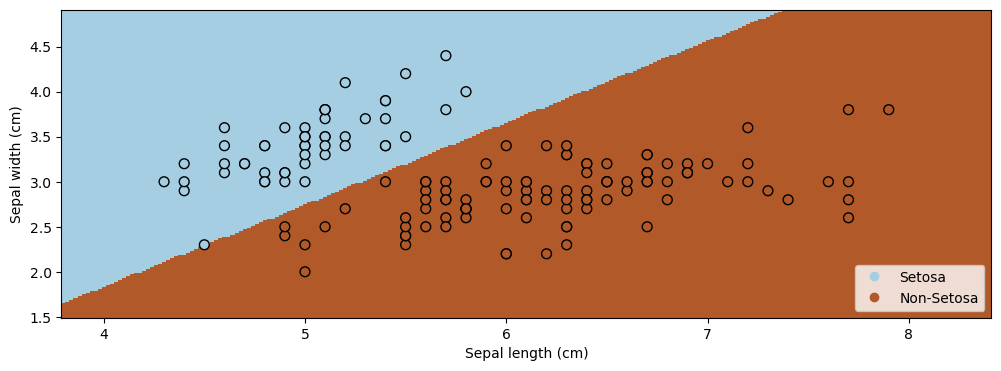

In [17]:
xmin = iris_X.iloc[:,0].min() - 0.5
xmax = iris_X.iloc[:,0].max() + 0.5
ymin = iris_X.iloc[:,1].min() - 0.5
ymax = iris_X.iloc[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02), np.arange(ymin, ymax, 0.02))
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z > 0.5] = 1
Z[Z < 0.5] = 0
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
p1 = plt.scatter(iris_X.iloc[:,0], iris_X.iloc[:,1], c=iris_y2, edgecolor='k', s=50,
                cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')